# Programming Machine Learning Lab
# Exercise 7

**General Instructions:**

1. You need to submit the PDF as well as the filled notebook file.
1. Name your submissions by prefixing your matriculation number to the filename. Example, if your MR is 12345 then rename the files as **"12345_Exercise_7.xxx"**
1. Complete all your tasks and then do a clean run before generating the final PDF. (_Clear All Ouputs_ and _Run All_ commands in Jupyter notebook)

**Exercise Specific instructions::**

1. You are allowed to use only NumPy and Pandas (unless stated otherwise). You can use any library for visualizations.


### Part 1

**Distance Metrics**

In this exercise, we will learn about distance metrics. A natural distance measure for sequences is the so-called edit distance or *Levenshtein distance*. You can read up more about it here (https://en.wikipedia.org/wiki/Levenshtein_distance). 

Your task is to implement a function called levenshtein_dist, that takes two input strings and calculates the distance between them. Ultimately, you need to find the Levenshtein distance between **"random_1.txt"** and **"random_2.txt"**. The resultant distance of the two texts should be between 40-50.

In [1]:
## Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
### Write your code here
class Distance_Metrics:
    def levenshtein_dist(self, u, v):
        size_x, size_y = len(u) + 1, len(v) + 1

        # Matrix initialization
        matrix = [[0] * size_y for _ in range(size_x)]

        # Initialize the first row and column of the matrix
        for x in range(size_x):
            matrix[x][0] = x
        for y in range(size_y):
            matrix[0][y] = y

        # Populate the matrix
        for x in range(1, size_x):
            for y in range(1, size_y):
                # If characters are the same, cost is 0
                if u[x - 1] == v[y - 1]:
                    matrix[x][y] = min(
                        matrix[x - 1][y] + 1,     # deletions
                        matrix[x - 1][y - 1],     # no operations
                        matrix[x][y - 1] + 1      # insertions
                    )
                else:
                    # If characters are different
                    matrix[x][y] = min(
                        matrix[x - 1][y] + 1,
                        matrix[x - 1][y - 1] + 1,
                        matrix[x][y - 1] + 1
                    )

        return matrix[size_x - 1][size_y - 1]
    
    def manhattan_dist(self,u,v):
        return np.sum(np.abs(u-v))

    def euclidean_dist(self,u,v):
        return np.sqrt(np.sum((u-v)**2))

    def chebyshev_dist(self,u,v):
        return np.max(np.abs(u-v))

In [3]:
#read the files
with open('random_1.txt', 'r') as file:
    str1 = file.read().replace('\n', '')

with open('random_2.txt', 'r') as file:
    str2 = file.read().replace('\n', '')

#calculate levensthein distance
Distance_Metrics().levenshtein_dist(str1, str2)

46

**Minkowski Metric**

We will now implement the Manhattan, Euclidian and Chebyshev distance metrics as defined below

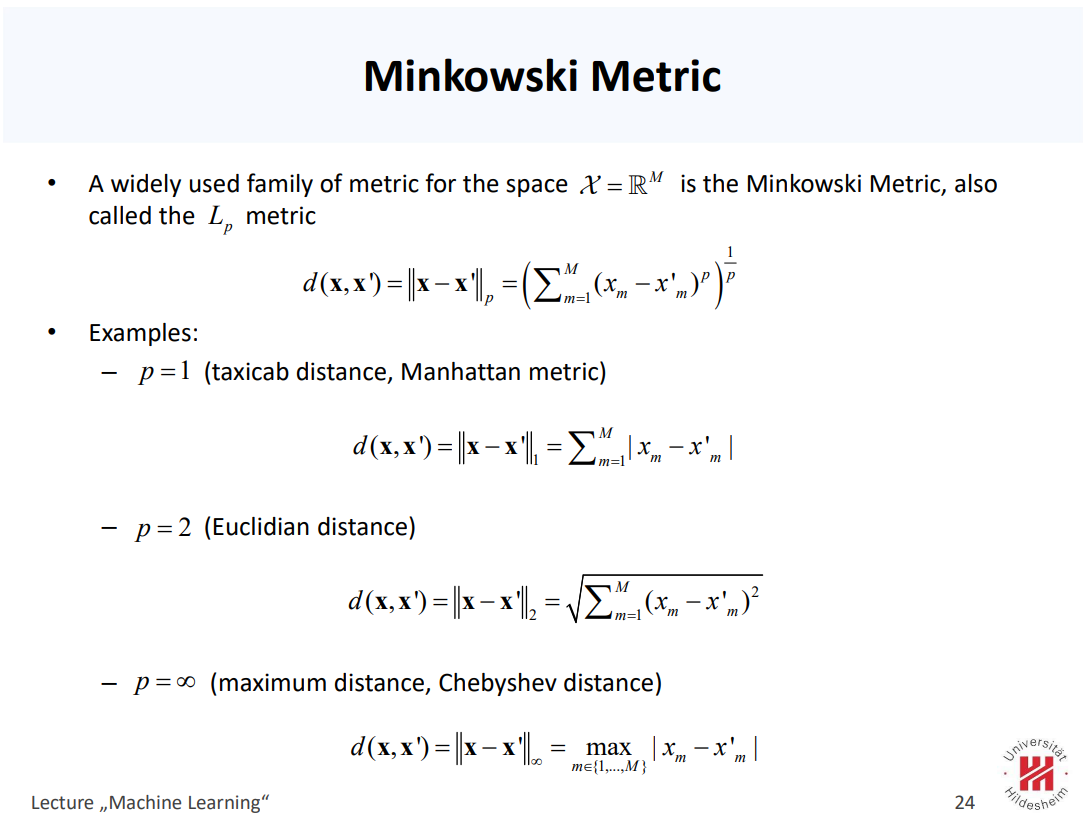

In [4]:
### Write your code here
import numpy as np

## Sample to check implementation

X_1 = np.array([1,3,4])
X_2 = np.array([2,4,1])

#Create the Distance Metrics instance and calculate the required distances
dist = Distance_Metrics()
print(f'The Manhatten distance is: {dist.manhattan_dist(X_1, X_2)}')
print(f'The Euclidean distance is: {dist.euclidean_dist(X_1, X_2)}')
print(f'The Chebyshev distance is: {dist.chebyshev_dist(X_1, X_2)}')

The Manhatten distance is: 5
The Euclidean distance is: 3.3166247903554
The Chebyshev distance is: 3


### Part 2

**K-Nearest Neighbor Classifier**

For this part, you need to implement a K-Nearest Neighbor Classifier, the basic algorithm is given by:

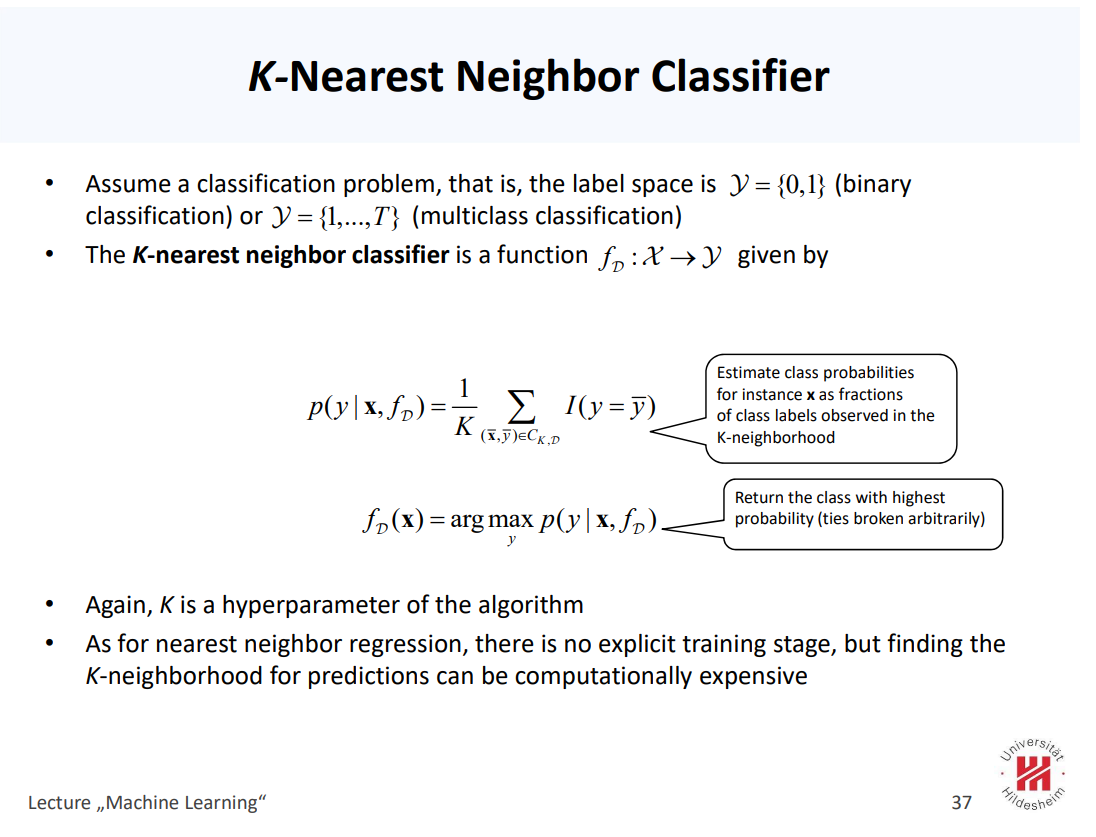


You need to use the iris dataset (from sklearn) for this task.
- Divide the dataset into train, validation and test using 70-20-10 ratio.
- Perform standard scaling of the dataset. *(Hint: store the original mean and std of features for later use)*
- The algorithm should work with Manhattan, Euclidian and Chebyshev distance metrics
- Do a hyperparameter search over different values of *K* and the distance metrics using the train and validation datasets. 
- Once the best model is found (compare models based on f1-score), report the test results for that model (precision, recall and f1-score). **Note you need to create scoring functions from scartch and NOT use the pre-defined functions from sklearn.**
- Train your model once more by combining both train and validation datasets for training (with the best hyperparameters). Compare the results with the model trained on just train split. Comment if there's a difference.

**Note: You are only allowed to use sklearn to read the iris dataset. The rest of the code should be in Numpy**

In [5]:
### Write your code here
iris = load_iris()
X, y = iris.data, iris.target

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=11)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=20)

# standard scaling
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_val = (X_val - mean) / std
X_test = (X_test - mean) / std

In [6]:
### Write your code here
class KNNClassifier(Distance_Metrics):
    def __init__(self, k=3, metric='euclidean'):
        self.k = k
        self.metric = metric
        self.get_distance_metric()
    
    def get_distance_metric(self):
        if self.metric == 'euclidean':
            self.calculate_distance = self.euclidean_dist
        elif self.metric == 'manhatten':
            self.calculate_distance = self.manhattan_dist
        elif self.metric == 'chebyshev':
            self.calculate_distance = self.chebyshev_dist

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [self.calculate_distance(x, x_train) for x_train in self.X_train]
        
        # Get indices of k-nearest training data points
        k_indices = np.argsort(distances)[:self.k]
        
        # Get the labels of the k-nearest training data points
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # Perform simple voting
        unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
        most_common_label = unique_labels[np.argmax(counts)]
        
        return most_common_label
    
    def calculate_metrics(self, y_true, y_pred):
        unique_classes = np.unique(np.concatenate((y_true, y_pred)))
        num_classes = len(unique_classes)

        f1_scores = []
        precision_list = []
        recall_list = []
        
        for class_label in unique_classes:
            # Calculate True Positives, False Positives, and False Negatives for each class
            tp = np.sum((y_true == class_label) & (y_pred == class_label))
            fp = np.sum((y_true != class_label) & (y_pred == class_label))
            fn = np.sum((y_true == class_label) & (y_pred != class_label))

            # Calculate Precision and Recall for each class
            precision = tp / (tp + fp) if (tp + fp) > 0 else 0
            recall = tp / (tp + fn) if (tp + fn) > 0 else 0
            
            precision_list.append(precision)
            recall_list.append(recall)

            # Calculate F1-score for each class
            f1_score_class = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
            f1_scores.append(f1_score_class)

        # Compute the average Precision, Recall, F1-score across all classes
        avg_f1_score = np.mean(f1_scores)
        avg_precision = np.mean(precision_list)
        avg_recall = np.mean(recall_list)

        return avg_precision, avg_recall, avg_f1_score

# Create and train the KNN classifier
# Use a sample K value of 3 and euclidean distance as the criteria
knn_classifier = KNNClassifier(k=3)
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
p, r, f1 = knn_classifier.calculate_metrics(y_test, y_pred)
print(f"Accuracy: {accuracy}, f1-Score: {f1}")

Accuracy: 0.8666666666666667, f1-Score: 0.8888888888888888


In [7]:
def hyperparameter_search(X_train, y_train, X_val, y_val, k_values, distance_metrics):
    best_f1 = 0
    best_k = None
    best_metric = None

    for k in k_values:
        for metric in distance_metrics:
            knn_classifier = KNNClassifier(k=k, metric=metric)
            knn_classifier.fit(X_train, y_train)
            y_pred_val = knn_classifier.predict(X_val)
            
            #check the f1-score
            _, _, current_f1 = knn_classifier.calculate_metrics(y_val, y_pred_val)
            
            print(f"K: {k}, Metric: {metric}, f1-score: {current_f1}")

            if current_f1 > best_f1:
                best_f1 = current_f1
                best_k = k
                best_metric = metric

    print(f"Best Hyperparameters - K: {best_k}, Distance Metric: {best_metric}, f1: {best_f1}")
    return best_k, best_metric

In [8]:
sample_k_values = list(range(1,9,2)) #trying out bunch of K-values
sample_distances = ['euclidean', 'manhatten', 'chebyshev'] #trying out different distance metrics
best_k, best_metric = hyperparameter_search(X_train, y_train, X_val, y_val, sample_k_values, sample_distances)

K: 1, Metric: euclidean, f1-score: 0.9665831244778613
K: 1, Metric: manhatten, f1-score: 0.9333333333333332
K: 1, Metric: chebyshev, f1-score: 0.9584859584859585
K: 3, Metric: euclidean, f1-score: 0.9584859584859585
K: 3, Metric: manhatten, f1-score: 0.9665831244778613
K: 3, Metric: chebyshev, f1-score: 0.9584859584859585
K: 5, Metric: euclidean, f1-score: 0.9584859584859585
K: 5, Metric: manhatten, f1-score: 0.9333333333333332


K: 5, Metric: chebyshev, f1-score: 0.9584859584859585
K: 7, Metric: euclidean, f1-score: 1.0
K: 7, Metric: manhatten, f1-score: 0.9665831244778613
K: 7, Metric: chebyshev, f1-score: 0.9251526251526251
Best Hyperparameters - K: 7, Distance Metric: euclidean, f1: 1.0


In [9]:
# test results for the best model
best_model = KNNClassifier(best_k, best_metric)
best_model.fit(X_train, y_train)
y_pred_test = best_model.predict(X_test)
precision, recall, f1_score = best_model.calculate_metrics(y_test, y_pred_test)

print(f'Precision: {precision}, Recall: {recall}, F1-score: {f1_score}')

Precision: 0.9047619047619048, Recall: 0.9047619047619048, F1-score: 0.8888888888888888


In [10]:
# Combine train and validation datasets
X_train_val = np.concatenate((X_train, X_val), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)

# Train with best hyperparameters over combined dataset
combined_model = KNNClassifier(best_k, best_metric)
combined_model.fit(X_train_val, y_train_val)
y_pred_test = combined_model.predict(X_test)

precision, recall, f1_score = best_model.calculate_metrics(y_test, y_pred_test)
print(f'Precision: {precision}, Recall: {recall}, F1-score: {f1_score}')

Precision: 0.9047619047619048, Recall: 0.9047619047619048, F1-score: 0.8888888888888888


**Visualization**

You need to visualize the decision boundaries for the best k-NN classifier for all combination of features. As there are 4 features, we would get 6 plots. (F1xF2, F1xF3, F1xF4, F2xF3, F2xF4 and F3xF4). The plots should look like the given example. Please appropriately label the axes of all figures.

*You need to visualize the data in the **original feature space**, for this purpose, you need to descale the data after classifying the gridmesh* $$z ={x_{scaled} \times {\text{std}(x_{orig})}+\text{mean}(x_{orig})}$$

Color scheme for all 6 plots should be consistent.

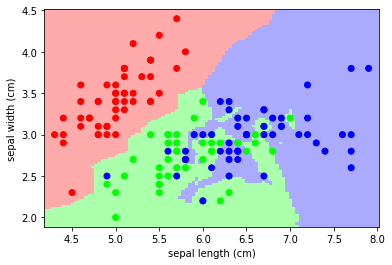

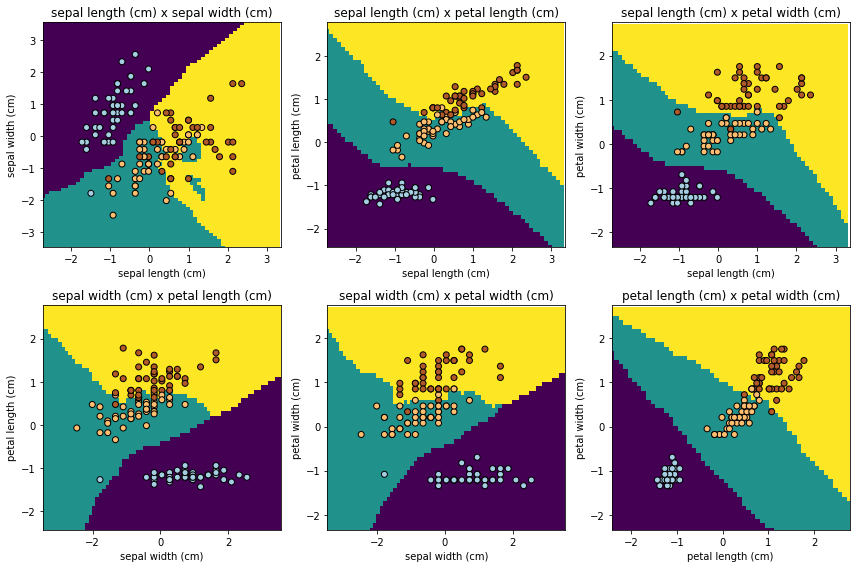

In [11]:
feature_pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

feature_names = iris.feature_names

plt.figure(figsize=(12, 8))

for k, pair in enumerate(feature_pairs, 1):
    # take two features
    X_pair = X_train_val[:, pair]
    x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1  # to get the full range
    y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1

    # meshgrid of points with a distance h between them
    h = 0.1  # Adjust the step size
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # flatten the arrays and create a 2D array
    grid = np.concatenate((xx.reshape(-1,1), yy.reshape(-1,1)),axis=1)

    # Fit the KNN model only once
    knn_model = KNNClassifier(best_k, best_metric)
    knn_model.fit(X_pair, y_train_val)

    # the function value for the whole grid
    Z = knn_model.predict(grid)
    # match the shape of the grid.
    Z = Z.reshape(xx.shape)

    # Create a new subplot
    plt.subplot(2, 3, k)

    # decision boundary
    plt.pcolormesh(xx, yy, Z)

    # training points
    plt.scatter(X_train_val[:, pair[0]], X_train_val[:, pair[1]], c=y_train_val, edgecolors='k', cmap=plt.cm.Paired)

    # limit so that both plots overlap
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xlabel(feature_names[pair[0]])
    plt.ylabel(feature_names[pair[1]])
    plt.title(f'{feature_names[pair[0]]} x {feature_names[pair[1]]}')

plt.tight_layout()
plt.show()

### Part 3

**Over-vs-Underfitting**

In this part, we will use Polynomial regression to understand how over and under-fitting works. Using the below given code, you need to generate multiple datasets. The sizes of the datasets should be $[10,20,40,80,160,320,640]$.

- Create a Polynomial Feature Transformer. This is a preprocessing step that simply takes in a value (x) and returns its higher powers upto the degree D (i.e. $[x^1,x^2,x^3,...,x^D]$).
- Transform the x features using the Polynomial Feature Transformer. 
- Now, if we fit a linear regressor using these transformed features, we are in essence creating a polynomial regressor. For this, create an object class Linear_Regressor that can be fitted on arbitary number of features. You can use any algorithm to create this class (**sklearn is not allowed**). Use MSE loss for this. *(Remember not to forget the bias term)*
- Perform Hyper-parameter tunning using this Linear_Regressor. You are to try out different degree models for all datasets. (Use at least 10 different degree models ranging between 1 and 20). Compare the results on validation data to find the best degree models for each size of dataset. 

In [12]:
import numpy as np
import matplotlib.pyplot as plt 
def func(x):
    return 2*x + 0.25*np.sin(8 * np.pi * x) + 0.5*np.sin(3 * np.pi * x) \
         - 3*(x**3) + 0.5*(x**5) + 5 

def get_data(size):
    rng = np.random.RandomState(2023)
    x_train = rng.uniform(0.0, 1.0, size)
    x_train = np.sort(x_train)
    y_train = func(x_train) + rng.normal(scale=0.1, size=size)  

    x_val = rng.uniform(0.0, 1.0, int(0.2*size))
    x_val = np.sort(x_val)
    y_val = func(x_val) + rng.normal(scale=0.05, size=int(0.2*size))

    return x_train, y_train, x_val, y_val

x_test = np.linspace(0, 1., 200)
y_test =  func(x_test)

In [13]:
### Write your code here
# Polynomial Feature Transformer
def polynomial_features(x, D):
    return np.array([x**d for d in range(1, D+1)]).T

class LinearRegressor:
    def __init__(self):
        self.weights = None

    def fit(self, X, y):
                      #bias term
      X = np.hstack((np.ones((X.shape[0], 1)), X))
      # create identity matrix and multipliy it by 0.1 (small const) for regulization
      I = 0.1 * np.eye(X.shape[1])
      # Adding I helps to singular or nearly singular matrix's.
      self.weights = np.linalg.inv(X.T @ X + I) @ X.T @ y

    def predict(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        return X @ self.weights

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [14]:
sizes = [10, 20, 40, 80, 160, 320, 640]
degrees = range(1, 21)

for size in sizes:
    x_train, y_train, x_val, y_val = get_data(size)
    best_mse = float('inf')
    best_degree = None

    for D in degrees:
        # Transform the x features
        X_train = polynomial_features(x_train, D)
        X_val = polynomial_features(x_val, D)

        # Fit the linear regressor
        model = LinearRegressor()
        model.fit(X_train, y_train)

        # MSE on validation
        y_pred = model.predict(X_val)
        loss = mse(y_val, y_pred)

        if loss < best_mse:
            best_mse = loss
            best_degree = D

    print(f'Best degree for dataset of size {size}: {best_degree}')

Best degree for dataset of size 10: 3
Best degree for dataset of size 20: 2
Best degree for dataset of size 40: 1
Best degree for dataset of size 80: 20
Best degree for dataset of size 160: 20
Best degree for dataset of size 320: 20
Best degree for dataset of size 640: 20


**Visualization**

- Plot the train/val/test MSE losses for each degree model per data-size. (This would be one plot per data size).
- Visualize the test results of all these different models vs data sizes. (This should be a single plot).
- Comment on how the degree hyperparameter changes as data size is increased. Also create a visualization to show the best degree model for each datasize. (This should be a single plot). 

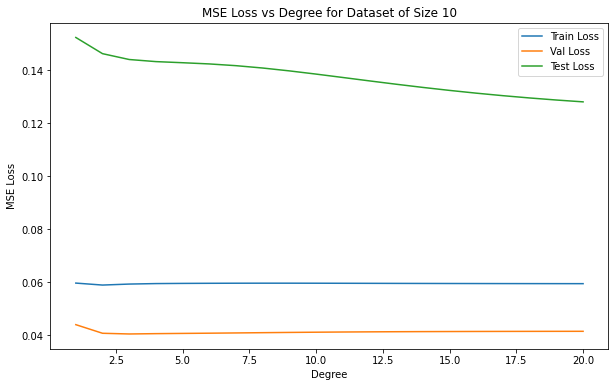

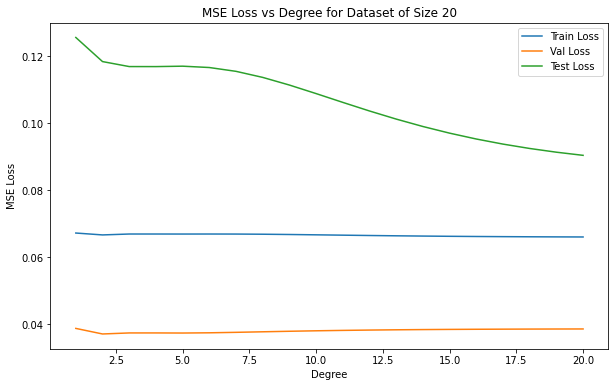

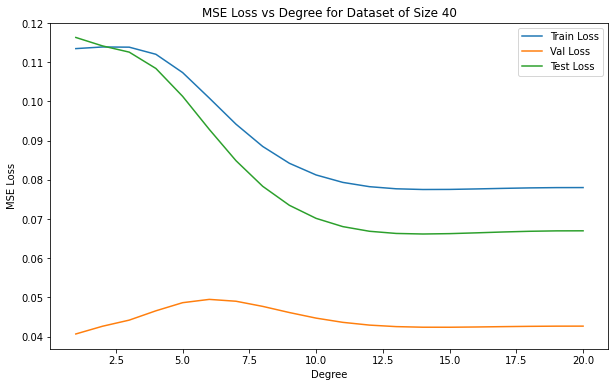

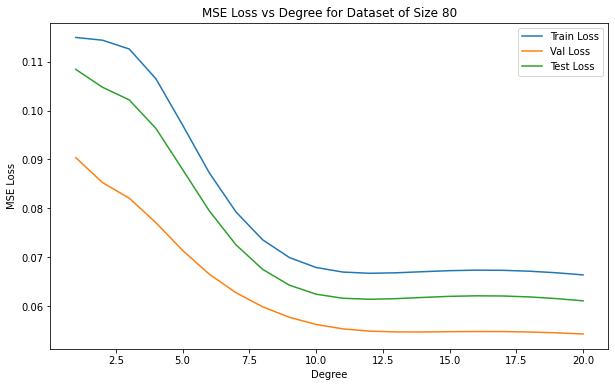

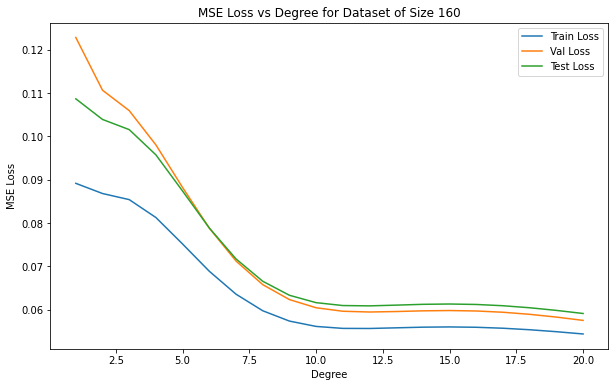

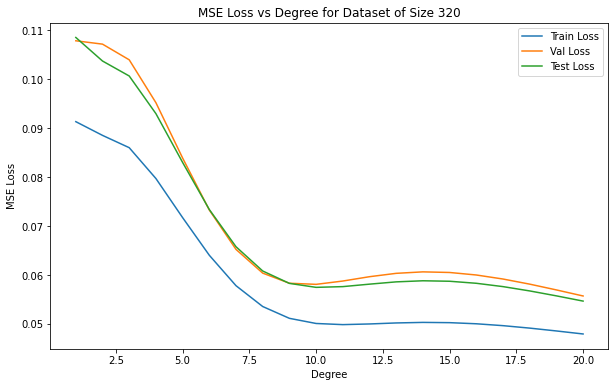

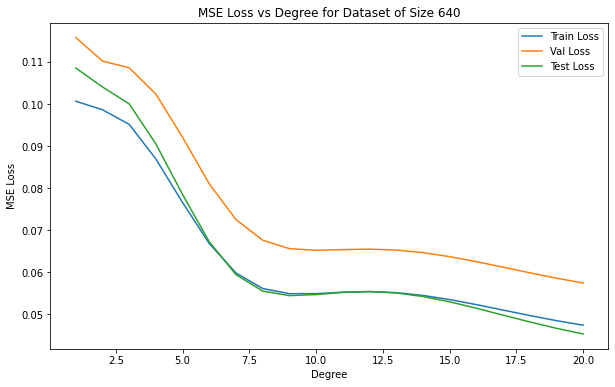

In [15]:
### Write your code here

#used in next part
test_losses = []
best_degrees = []

for size in sizes:
    x_train, y_train, x_val, y_val = get_data(size)
    x_test = np.linspace(0, 1., 200)
    y_test = func(x_test)

    best_mse = float('inf')
    best_degree = None

    # store MSE losses for this size
    train_losses_size = []
    val_losses_size = []
    test_losses_size = []

    for D in degrees:
        # Transform x
        X_train = polynomial_features(x_train, D)
        X_val = polynomial_features(x_val, D)
        X_test = polynomial_features(x_test, D)

        # Fit
        model = LinearRegressor()
        model.fit(X_train, y_train)

        # predict then get MSE on the train, val and test
        y_pred_train = model.predict(X_train)
        y_pred_val = model.predict(X_val)
        y_pred_test = model.predict(X_test)

        train_loss = mse(y_train, y_pred_train)
        val_loss = mse(y_val, y_pred_val)
        test_loss = mse(y_test, y_pred_test)

        # Store the MSE losses for this degree for next part
        train_losses_size.append(train_loss)
        val_losses_size.append(val_loss)
        test_losses_size.append(test_loss)

        if val_loss < best_mse:
            best_mse = val_loss
            best_degree = D

    # Store the MSE test loss and best degree for this size for next part
    test_losses.append(test_losses_size)
    best_degrees.append(best_degree)

    # Plot for current size
    plt.figure(figsize=(10, 6))
    plt.plot(degrees, train_losses_size, label='Train Loss')
    plt.plot(degrees, val_losses_size, label='Val Loss')
    plt.plot(degrees, test_losses_size, label='Test Loss')
    plt.xlabel('Degree')
    plt.ylabel('MSE Loss')
    plt.title(f'MSE Loss vs Degree for Dataset of Size {size}')
    plt.legend()
    plt.show()

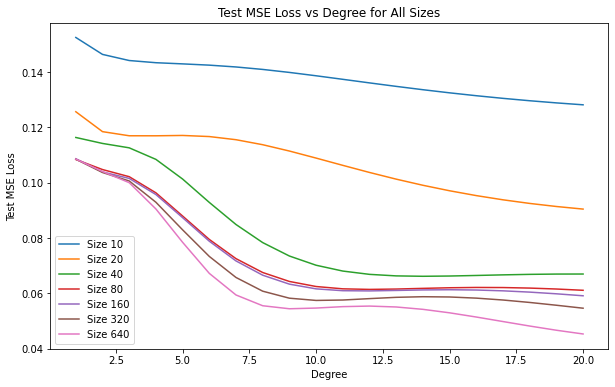

In [16]:
# Visualize the test results of all models vs data sizes
plt.figure(figsize=(10, 6))
for i, size in enumerate(sizes):
    plt.plot(degrees, test_losses[i], label=f'Size {size}')
plt.xlabel('Degree')
plt.ylabel('Test MSE Loss')
plt.title('Test MSE Loss vs Degree for All Sizes')
plt.legend()
plt.show()

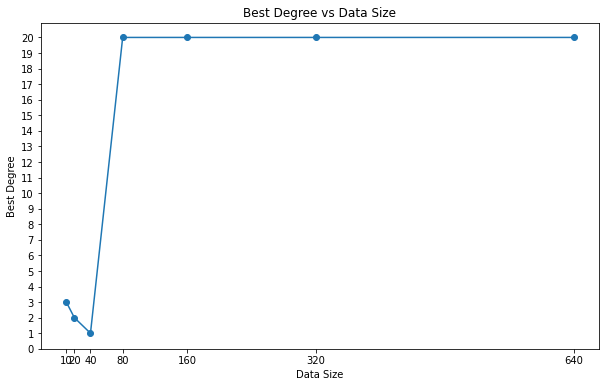

In [17]:
# Visualize the best degree model for each data size
plt.figure(figsize=(10, 6))
plt.plot(sizes, best_degrees, marker='o')
plt.xticks([10, 20, 40, 80, 160, 320, 640])
plt.yticks(range(0, 21, 1))
plt.xlabel('Data Size')
plt.ylabel('Best Degree')
plt.title('Best Degree vs Data Size')
plt.show()

**Visualization Continued**

Plot the predictions for the best degree model for each dataset. 
- Properly label the axes.
- Include the MSE loss and datasize in the title of the figure.
-  Add a legend as well.

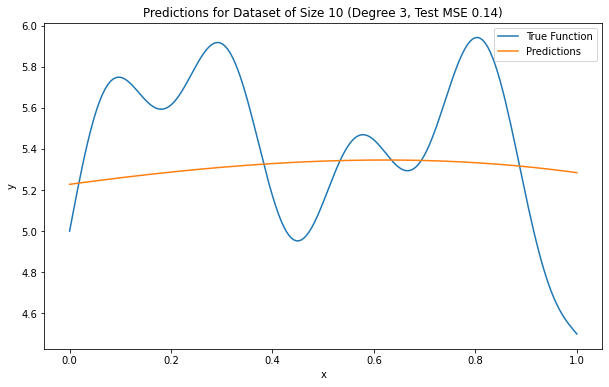

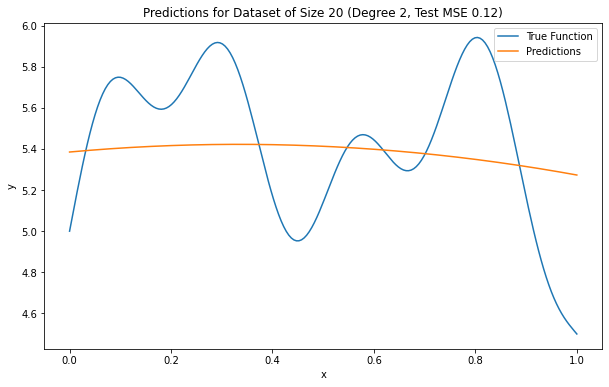

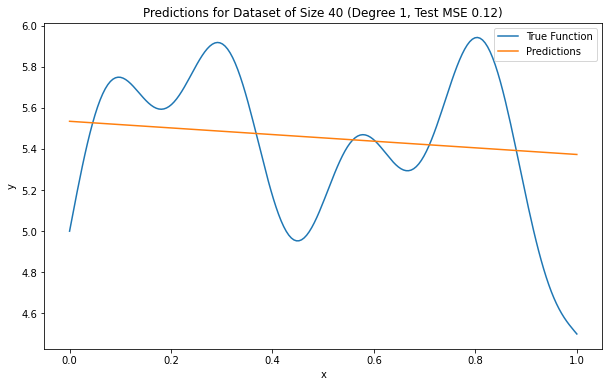

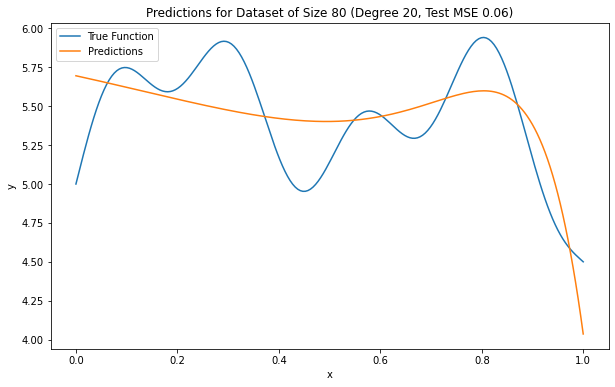

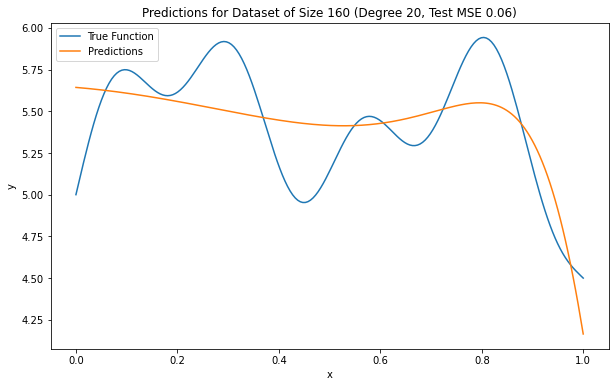

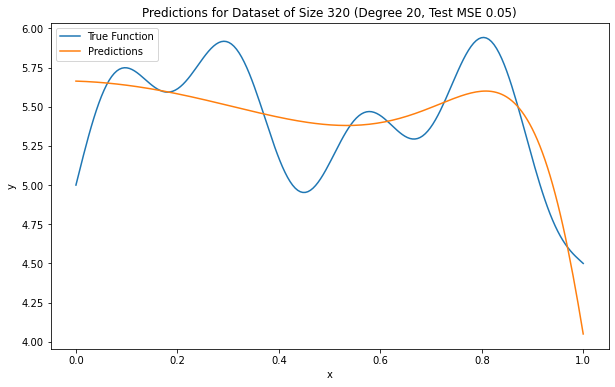

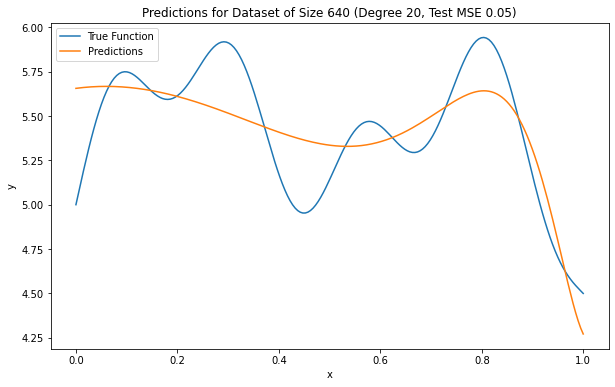

In [18]:
for ii in [10,20,40,80,160,320,640]:
    x_train, y_train, x_val, y_val = get_data(ii)

    # Transform x using best degree
    D = best_degrees[sizes.index(ii)]
    X_train = polynomial_features(x_train, D)
    X_test = polynomial_features(x_test, D)

    # Fit
    model = LinearRegressor()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    test_loss = mse(y_test, y_pred)

    # Plot the true function and the predictions
    plt.figure(figsize=(10, 6))
    plt.plot(x_test, y_test, label='True Function')
    plt.plot(x_test, y_pred, label='Predictions')

    # Add labels, title, and legend
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Predictions for Dataset of Size {ii} (Degree {D}, Test MSE {test_loss:.2f})')
    plt.legend()

    plt.show()
